### Amazon Fine Food Review Analysis

Objective: Determine the review is either positive (4 or 5) or Negative (1 or 2) or Neutral (3) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# As we are dealing with a huge dataset which usually comes in Sequel Lite Database.Therefore,
import sqlite3

#As the Project is on Natural Language Processing
import nltk
import string

# NLP feature Extraction
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer

#For NLP preprocessing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords,words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pickle
with open('preprocessed_review.pkl', 'rb') as ppr:
    preprocessed_review = pickle.load(ppr)

In [3]:
len(preprocessed_review)

46058

### Reading Data

In [4]:
#As this is Sequel Database it cannot be directly called by pandas firts the SQL Conection needs to happen
#Connecting to SQl
con = sqlite3.connect('database.sqlite')
con

In [5]:
#Fetching the required Data from SQL
#As we only want postive and negative reviews.ThereFore,
filtered_data = pd.read_sql_query("""SELECT * FROM REVIEWS WHERE Score !=3 LIMIT 50000""",con)

In [6]:
filtered_data.shape

(50000, 10)

In [7]:
df = filtered_data.copy()

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df['Score'].value_counts(normalize = True)

5    0.68014
4    0.15562
1    0.10358
2    0.06066
Name: Score, dtype: float64

In [10]:
def binary(x):
    if x < 3:
        return 0
    else :
        return 1

In [11]:
PositiveNegative = df['Score'].map(binary)
df['Score'] = PositiveNegative
print('Number of data points are :',df.shape)
print('************************'*10)
print(df['Score'].value_counts(normalize = True))
print('\n')
print(df.head())


Number of data points are : (50000, 10)
************************************************************************************************************************************************************************************************************************************************
1    0.83576
0    0.16424
Name: Score, dtype: float64


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      1  1303862400   
1                     0                       0      0  1346976000   
2                     1         

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
#Sorting The D  ata in Ascending Order

In [14]:
sorted_data = df.sort_values('ProductId',axis = 0,ascending = True)

In [15]:
sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,0,1192060800,made in china,My dogs loves this chicken but its a product f...
22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...


In [16]:
sorted_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [17]:
#As we are doing Sentiment Analysis then the similar words in Text Columns will not have any significance as only one 
final = sorted_data.drop_duplicates(subset = {'UserId','ProfileName','Text'},keep = 'first')

In [18]:
sorted_data.shape

(50000, 10)

In [19]:
final.shape

(46058, 10)

## Text Analytics

### Data Cleaning

In [20]:
sent_0 = final['Text'].values[0]
print(sent_0)
print('='*20)

sent_10 = final['Text'].values[10]
print(sent_10)
print('='*20)

sent_100 = final['Text'].values[100]
print(sent_100)
print('='*20)

sent_200 = final['Text'].values[200]
print(sent_200)
print('='*20)



sent_3000= final['Text'].values[3000]
print(sent_3000)
print('='*20)


sent_4110 = final['Text'].values[4110]
print(sent_4110)
print('='*20)

My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.
I've been trying to find the individual-pack option (at the affordable price) for months now. I love having the ability to know exactly how much creamer I'm using by counting the individual packets. (This product isn't available in my grocery store-- just by the coffee dispensers at local convenience stores.) They're perfect for keeping at my desk at work~~I don't have to use the community fridge, and it doesn't lump up in my coffee like the powdered versions do. It's a little less convenient at home, though, where I'm accustomed to using my refrigerated bottled versions~~opening the little packets one at a time at 5 am can get annoying--but then again, I know exactly ho

In [21]:
import re
sent_0 = re.sub(r"http/S+","",sent_0)
sent_10 = re.sub(r"http/S+","",sent_10)
sent_100 = re.sub(r"http/S+","",sent_100)
sent_3000 = re.sub(r"http/S+","",sent_3000)
sent_4110 = re.sub(r"http/S+","",sent_4110)

In [22]:
#Web Scraping
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_10, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_100, 'lxml')
text = soup.get_text()
print(text)
print("="*50)


soup = BeautifulSoup(sent_200, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_3000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4110, 'lxml')
text = soup.get_text()
print(text)
print("="*50)




My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.
I've been trying to find the individual-pack option (at the affordable price) for months now. I love having the ability to know exactly how much creamer I'm using by counting the individual packets. (This product isn't available in my grocery store-- just by the coffee dispensers at local convenience stores.) They're perfect for keeping at my desk at work~~I don't have to use the community fridge, and it doesn't lump up in my coffee like the powdered versions do. It's a little less convenient at home, though, where I'm accustomed to using my refrigerated bottled versions~~opening the little packets one at a time at 5 am can get annoying--but then again, I know exactly ho

In [23]:
sent_0 = re.sub('[^A-Za-z]+'," ",sent_0)
print(sent_0)

My dogs loves this chicken but its a product from China so we wont be buying it anymore Its very hard to find any chicken products made in the USA but they are out there but this one isnt Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports 


In [24]:
def decontracted(phrase):
    phrase = re.sub("don't",'do not',phrase)
    phrase = re.sub("won't",'will not',phrase)
    phrase = re.sub("couldn't",'could not',phrase)
    phrase = re.sub("wouldn't",'would not',phrase)
    phrase = re.sub("it's",'it is',phrase)
    phrase = re.sub("haven't","have not",phrase)
    phrase = re.sub("can't",'can not',phrase)
    phrase = re.sub("hasn't",'has not',phrase)
    phrase = re.sub("shouldn't",'should not',phrase)
    phrase = re.sub("didn't",'did not',phrase)
    
    phrase = re.sub(r"\'s",'is',phrase)
    phrase = re.sub(r"\'re",'are',phrase)
    phrase = re.sub(r"\'ve",'have',phrase)
    phrase = re.sub(r"\'t",'not',phrase)
    phrase = re.sub(r"\'ll",'will',phrase)
    phrase = re.sub(r"\'m",'am',phrase)
    
    return phrase

In [25]:
sent_1 = final['Text'].values[1663]
sent_1

"Freeze dried liver has a hypnotic effect on dogs.  They LOVE it and will do just about anything for it, so it is a great treat to use for training.  (Powdered freeze dried liver is even added to many dog medicines nowadays-- heartworm and arthritis tablets, etc.-- because it causes the dog to scarf the medicine down like a treat.)<br /><br />Freeze dried liver has a dry, hard, yet powdery/easy to chew consistency.  It comes chopped/cubed.  It is extremely lightweight due to the fact there is so little moisture in the product (thus the low weights on product labels).<br /><br />Even though your dog will love liver treats, you shouldn't overfeed it.  The manufacturer recommends 1-2 cubes daily for small dogs, 2-3 cubes for medium dogs, and 3-4 cubes for large dogs.<br /><br />The largest package sizes of liver treats tend to be far more economical.  I recommend buying the larger tubs, as you will save lots of money, you'll have a handy treat supply around for a longer time, and your dog

In [26]:
decontracted(sent_1)

'Freeze dried liver has a hypnotic effect on dogs.  They LOVE it and will do just about anything for it, so it is a great treat to use for training.  (Powdered freeze dried liver is even added to many dog medicines nowadays-- heartworm and arthritis tablets, etc.-- because it causes the dog to scarf the medicine down like a treat.)<br /><br />Freeze dried liver has a dry, hard, yet powdery/easy to chew consistency.  It comes chopped/cubed.  It is extremely lightweight due to the fact there is so little moisture in the product (thus the low weights on product labels).<br /><br />Even though your dog will love liver treats, you should not overfeed it.  The manufacturer recommends 1-2 cubes daily for small dogs, 2-3 cubes for medium dogs, and 3-4 cubes for large dogs.<br /><br />The largest package sizes of liver treats tend to be far more economical.  I recommend buying the larger tubs, as you will save lots of money, youwill have a handy treat supply around for a longer time, and your d

In [27]:
sent_110 = final['Text'].values[1197]
print(sent_110)
print('='*20)

I learned to use Rumford from my Mother.  She could always taste the baking powder if another one was used.  Therefore, we never had Calumet in the house.


In [28]:
import contractions
sent_110 = contractions.fix(sent_110)
print(sent_110)

I learned to use Rumford from my Mother.  She could always taste the baking powder if another one was used.  Therefore, we never had Calumet in the house.


#### Remove StopWords

In [29]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [29]:
stopwords = set(['okey','okay','br','yup','a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",'your','yours','yourself','yourselves','aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa',
 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaargh', 
 'aaaaaaaaaaaaaaaaacccccccckkkkkk', 'aaaaaaaaagghh', 'aaaaaaah', 
 'aaaaaaahhhhhh', 'aaaaaaarrrrrggghhh', 'aaaaaah', 'aaaaaahhh', 
 'aaaaaahhhh', 'aaaaaahhhhh', 'aaaaaahhhhhyaaaaaa', 'aaaaaand', 
 'aaaaaawwwwwwwwww', 'aaaaah', 'aaaaahhhhhhhhhhhhhhhh', 'aaaaallll', 'aaaaawsome', 'aaaah', 
 'aaaahhhhhh', 'aaaahhhhhhhhhhh', 'aaaallll', 'aaaand', 'aaaannnnddd', 'aaaarrrrghh', 'aaagh',
 'aaah', 'aaahhh', 'aaahhhhhh', 'aaahhhs', 'aaahs'])

Applying All the Cleaning Methods on all the Dataset

In [42]:
# from tqdm import tqdm

# lemm = WordNetLemmatizer()

# preprocessed_review = []

# for sentence in tqdm(final['Text'].values):
#     sentence = re.sub(r"http/S+", "", sentence)
#     sentence = BeautifulSoup(sentence, 'lxml').get_text()
#     sentence = contractions.fix(sentence)
#     sentence = re.sub('\S\*d\S*', ' ', sentence).strip()
#     sentence = re.sub('[^A-Za-z]+', ' ', sentence)
#     stopword = set(stopwords.words('english'))
#     word_tokens = sentence.split()
    
#     word_dictionary = set(words.words())
    
#     filtered_sentence = [word for word in word_tokens if word.lower() in word_dictionary]
#     lemmatized_sentence = [lemm.lemmatize(word.lower()) for word in filtered_sentence if word.lower() not in stopword]
#     sentence = ' '.join(lemmatized_sentence)
#     preprocessed_review.append(sentence)

100%|██████████████████████████████████████████████████████████████████████████| 46058/46058 [4:15:30<00:00,  3.00it/s]


Checking the Preprocessed Reviews

In [69]:
import pickle
import joblib

In [45]:
with open('preprocessed_review.pkl', 'wb') as ppr:
    pickle.dump(preprocessed_review,ppr )

In [46]:
with open('preprocessed_review.pkl', 'rb') as ppr:
    preprocessed_review = pickle.load(ppr)

In [47]:
len(preprocessed_review)   

46058

In [30]:
preprocessed_review[2361]

'dog fed older dog dixie senior version nutritionally dense meat primary ingredient without empty dixie weight easier maintain formula marvelous shiny coat'

In [31]:
preprocessed_review[9100]

'major tea stash premium organic earl grey tea wonderful great flavor great price added benefit getting win win everyone highly'

In [32]:
preprocessed_review[1631]

'anything liver one best expensive weight well worth freeze drying process flavor nutrition'

### Feature Extraction

#### 1. Bag of Words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
countvec = CountVectorizer()
countvec.fit(preprocessed_review)
print("Some Feature Names :",countvec.get_feature_names()[:10])
print('*'*50)
bow_count = countvec.transform(preprocessed_review)
print("Type of Count Vectorizer :",type(bow_count))
print('The shape of BOW Vectorizer :',bow_count.get_shape())
print('The number of Unique Words :',bow_count.get_shape()[1])

Some Feature Names : ['aa', 'aback', 'abandon', 'abandoned', 'abb', 'abbey', 'abbreviation', 'abdomen', 'abdominal', 'abhor']
**************************************************
Type of Count Vectorizer : <class 'scipy.sparse.csr.csr_matrix'>
The shape of BOW Vectorizer : (46058, 15329)
The number of Unique Words : 15329


####  2. Bi-Grams N-Gram

In [37]:
#Bi-Gram,Tri-Gram,N-Gram
# The Removal of "not" or any negative words should be avoided in Stopwords while doing Ngram

countvec_bigram = CountVectorizer(ngram_range=(1, 2), min_df=5,max_features = 5000)
final_bigram = countvec_bigram.fit_transform(preprocessed_review)

print("Type of Count Vectorizer:", type(final_bigram))
print('The shape of Bi-Gram Vectorizer:', final_bigram.get_shape())
print('The number of Unique Words include Unigram and Bigram:', final_bigram.get_shape()[1])

print('*' * 20)

countvec_trigram = CountVectorizer(ngram_range=(1, 3), min_df=5,max_features = 5000)
final_trigram = countvec_trigram.fit_transform(preprocessed_review)

print("Type of Count Vectorizer:", type(final_trigram))
print('The shape of N-Gram Vectorizer:', final_trigram.get_shape())
print('The number of Unique Words include Unigram,Bigram and Trigram:', final_trigram.get_shape()[1])



Type of Count Vectorizer: <class 'scipy.sparse.csr.csr_matrix'>
The shape of Bi-Gram Vectorizer: (46058, 5000)
The number of Unique Words include Unigram and Bigram: 5000
********************
Type of Count Vectorizer: <class 'scipy.sparse.csr.csr_matrix'>
The shape of N-Gram Vectorizer: (46058, 5000)
The number of Unique Words include Unigram,Bigram and Trigram: 5000


#### TF-IDF Vectorizer

In [38]:
#TF-IDF Vectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2),min_df = 5)
tfidf.fit(preprocessed_review)
print("Some of the Unique Words in Corpus:",tfidf.get_feature_names()[:10])
tfidf_count = tfidf.transform(preprocessed_review)
print('*' * 20)

print("Type of Count Vectorizer:", type(tfidf_count))
print('The shape of Tf-idfVectorizer:', tfidf_count.get_shape())
print('The number of Unique Word in Tf-idf Vectorizer:', tfidf_count.get_shape()[1])



Some of the Unique Words in Corpus: ['aa', 'aback', 'abandon', 'abandoned', 'abdominal', 'ability', 'ability buy', 'able', 'able add', 'able afford']
********************
Type of Count Vectorizer: <class 'scipy.sparse.csr.csr_matrix'>
The shape of Tf-idfVectorizer: (46058, 50684)
The number of Unique Word in Tf-idf Vectorizer: 50684


In [39]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,0,1192060800,made in china,My dogs loves this chicken but its a product f...
22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...


## Model Building

In [34]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn import metrics
from tqdm import tqdm

rf = RandomForestClassifier(max_features = 'sqrt')


In [35]:
X = preprocessed_review
y = np.array(final['Score'])
X1,X_test,y1,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)
X_train,X_cv,y_train,y_cv = train_test_split(X1,y1,test_size = 0.3,random_state = 101)

In [36]:
y_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### Random Forest on Bag of Words

In [38]:
#Converting The Training,Testing and Cross Val Data into Bag of Words
count_vec = CountVectorizer(min_df=10,max_features=5000)
X_train_bow = count_vec.fit_transform(X_train)
X_cv_bow = count_vec.transform(X_cv)
X_test_bow = count_vec.transform(X_test)

scaler = StandardScaler(with_mean = False)
X_train_bow = scaler.fit_transform(X_train_bow)
X_cv_bow  = scaler.transform(X_cv_bow)
X_test_bow   = scaler.transform(X_test_bow)

In [39]:
X_train_bow.shape

(22568, 3940)

In [40]:
estimators = [10,20,50,100,120]
depth = [5,10,50,100,500,1000]

In [132]:
# param_grids = {'n_estimators': estimators,'max_depth': depth,'criterion' : ['gini','entropy']}
# rscv = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_grids,
#     cv=KFold(n_splits=5, shuffle=True),  # Use KFold instead of StratifiedKFold
#     n_jobs=-1,
#     scoring='roc_auc',
#     verbose=2
# )
# rscv.fit(X_train_bow, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# rscv.best_params_

In [62]:
# rf = RandomForestClassifier(n_estimators =120,max_depth = 500,max_features = 'sqrt',
#                             n_jobs = -1,criterion ='gini')
# rf.fit(X_train_bow,y_train)

RandomForestClassifier(max_depth=500, max_features='sqrt', n_estimators=120,
                       n_jobs=-1)

In [63]:
y_pred_rfbow = rf.predict(X_test_bow)

In [41]:
#As the Classification Report is unable to process.Therefore,
X = []
Y = []
Z = []
Zt =[]

for es in estimators:
    for d in depth :
        rf = RandomForestClassifier(n_estimators = es ,max_depth = d,max_features = 'sqrt',
                            n_jobs = -1)
        rf.fit(X_train_bow,y_train)
        pred = rf.predict_proba(X_cv_bow)[:,1]
        predt = rf.predict_proba(X_train_bow)[:,1]
        X.append(es)
        Y.append(d)
        Z.append(roc_auc_score(y_cv,pred))
        Zt.append(roc_auc_score(y_train,predt))

In [42]:
with open('Rf_Heatmap_values.pkl','rb') as rfheat:
    Rf_Heatmap_values = pickle.load(rfheat)

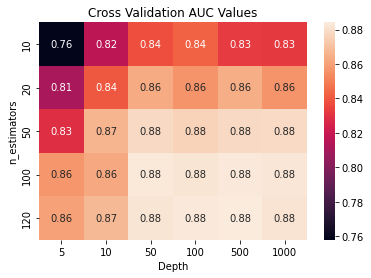

In [43]:
data_cv = pd.DataFrame({'n_estimators': X,'Depth':Y,'AUC':Z})
data_pivoted_cv = data_cv.pivot('n_estimators','Depth','AUC')
sns.heatmap(data_pivoted_cv,annot = True)
plt.title("Cross Validation AUC Values")
plt.show()

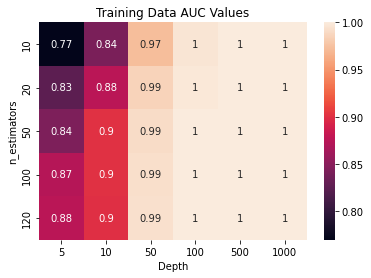

In [44]:
data_train = pd.DataFrame({'n_estimators': X,'Depth':Y,'AUC':Zt})
data_pivoted_train = data_train.pivot('n_estimators','Depth','AUC')
sns.heatmap(data_pivoted_train,annot = True)
plt.title("Training Data AUC Values")
plt.show()

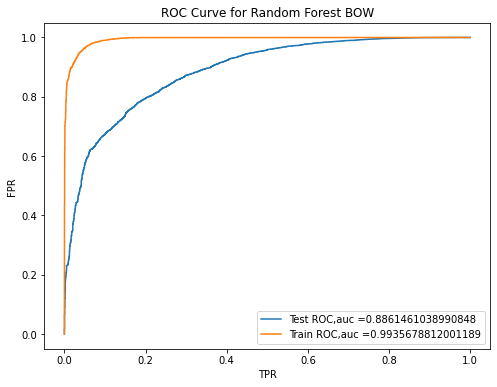

In [45]:
#As model tends to overfit in estimator = 120 and max_depth = 1000,Therefore by trial and error the values are chosen
rf = RandomForestClassifier(n_estimators = 100,max_depth = 50,max_features = 'sqrt',
                            n_jobs = -1,criterion ='gini')
rf.fit(X_train_bow,y_train)
y_pred_test = rf.predict_proba(X_test_bow)[:,1]
y_pred_train = rf.predict_proba(X_train_bow)[:,1]
fpr1,tpr1,threshold_test = metrics.roc_curve(y_test,y_pred_test)
fpr2,tpr2,threshold_train = metrics.roc_curve(y_train,y_pred_train)
plt.figure(figsize = (8,6))
plt.plot(fpr1,tpr1,label = 'Test ROC,auc ='+str(roc_auc_score(y_test,y_pred_test)))
plt.plot(fpr2,tpr2,label = 'Train ROC,auc ='+str(roc_auc_score(y_train,y_pred_train)))
plt.title('ROC Curve for Random Forest BOW')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend()
plt.show()

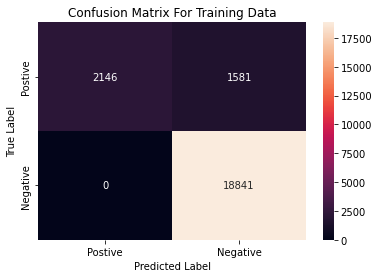

In [46]:
pred_train = rf.predict(X_train_bow)
con_mat_train = confusion_matrix(y_train,pred_train)
class_label = ['Postive','Negative']
con_data_train = pd.DataFrame(con_mat_train,index = class_label,columns = class_label)
sns.heatmap(con_data_train,annot = True,fmt = 'd')
plt.title('Confusion Matrix For Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [47]:
con_data_train

,Postive,Negative
Postive,2146,1581
Negative,0,18841


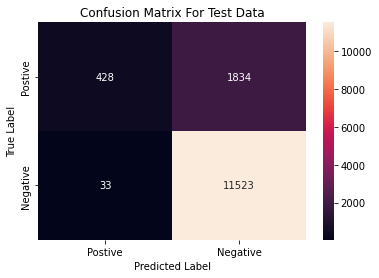

In [48]:
pred_test = rf.predict(X_test_bow)
con_mat_test = confusion_matrix(y_test,pred_test)
class_label = ['Postive','Negative']
con_data_test = pd.DataFrame(con_mat_test,index = class_label,columns = class_label)
sns.heatmap(con_data_test,annot = True,fmt = 'd')
plt.title('Confusion Matrix For Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:
con_data_test

,Postive,Negative
Postive,428,1834
Negative,33,11523


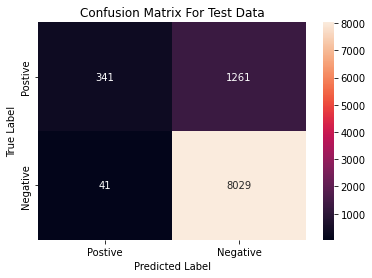

In [50]:
pred_test = rf.predict(X_cv_bow)
con_mat_cv = confusion_matrix(y_cv,pred_test)
class_label = ['Postive','Negative']
con_data_cv = pd.DataFrame(con_mat_cv,index = class_label,columns = class_label)
sns.heatmap(con_data_cv,annot = True,fmt = 'd')
plt.title('Confusion Matrix For Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
con_data_cv

,Postive,Negative
Postive,341,1261
Negative,41,8029


### RF Model with TFIDF 

In [53]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=5)
X_train_tf = tfidf.fit_transform(X_train)
X_cv_tf = tfidf.transform(X_cv)
X_test_tf = tfidf.transform(X_test)

scalar = StandardScaler(with_mean=False)
X_train_tf = scalar.fit_transform(X_train_tf)
X_test_tf= scalar.transform(X_test_tf)
X_cv_tf=scalar.transform(X_cv_tf)


In [ ]:
depth = [50,100,200,300,500,1000]
estimators = [5,10,20,40,100,120,150]

In [ ]:
# rf_tf = RandomForestClassifier(max_features='sqrt')
# param_grid_tf = [{'n_estimators': estimators,'max_depth' : depth}]

# rscv_tf = RandomizedSearchCV(estimator = rf,
#     param_distributions = param_grid_tf,
#     n_jobs = -1,verbose = 3,
#     cv = KFold(n_splits=5,random_state = 56,shuffle=True))
# rscv_tf.fit(X_train_tf,y_train)


In [183]:
# rscv_tf.best_params_

{'n_estimators': 20, 'max_depth': 120}

In [99]:
X = []
Y = []
Z = []
Zt = []

for es in estimators:
    for d in depth :
        rf = RandomForestClassifier(n_estimators = es ,max_depth = d,max_features = 'sqrt',
                            n_jobs = -1)
        rf.fit(X_train_bow,y_train)
        pred = rf.predict_proba(X_cv_bow)[:,1]
        predt = rf.predict_proba(X_train_bow)[:,1]
        X.append(es)
        Y.append(d)
        Z.append(roc_auc_score(y_cv,pred))
        Zt.append(roc_auc_score(y_train,predt))

In [100]:
data_heat_tf = {'X':X,'Y':Y,'Z':Z,'Zt':Zt}

In [54]:
with open('Rf_Heatmap_values_tf.pkl','rb') as rf_tf:
    data_heat_tf = pickle.load(rf_tf)

In [55]:
X = data_heat_tf['X']
Y = data_heat_tf['Y']
Z = data_heat_tf['Z']
Zt = data_heat_tf['Zt']

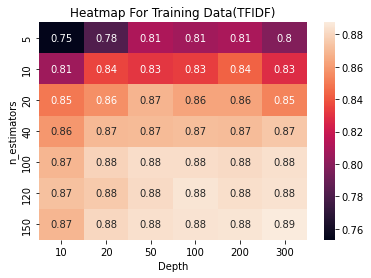

In [56]:
data_tf = pd.DataFrame({'n_estimators': X,'Depth' :Y,'AUC': Z})
data_pivot = data_tf.pivot('n_estimators','Depth','AUC')
sns.heatmap(data_pivot,annot = True)
plt.title('Heatmap For Training Data(TFIDF)')
plt.show()

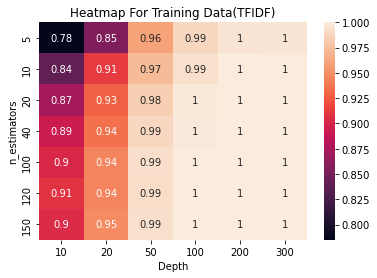

In [57]:
data_tf = pd.DataFrame({'n_estimators': X,'Depth':Y,'AUC':Zt})
data_pivot_tf = data_tf.pivot('n_estimators','Depth','AUC')
sns.heatmap(data_pivot_tf,annot = True)
plt.title('Heatmap For Training Data(TFIDF)')
plt.show()

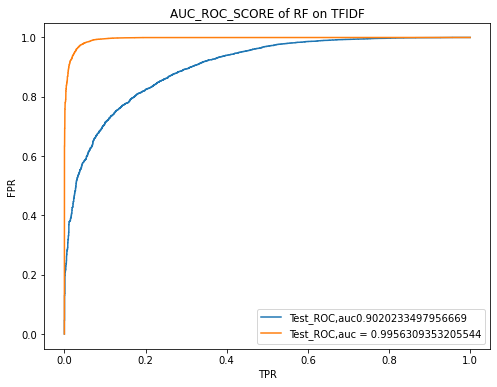

In [58]:
rf_tf = RandomForestClassifier(n_estimators = 120,max_depth = 50, max_features = 'sqrt',
                            n_jobs = -1)
rf_tf.fit(X_train_tf,y_train)

y_pred_test = rf_tf.predict_proba(X_test_tf)[:,1]
y_pred_train = rf_tf.predict_proba(X_train_tf)[:,1]

fpr1,tpr1,threshold1 = metrics.roc_curve(y_test,y_pred_test)
fpr2,tpr2,threshold2 = metrics.roc_curve(y_train,y_pred_train)
plt.figure(figsize = (8,6))
plt.plot(fpr1,tpr1,label = 'Test_ROC,auc' +str(roc_auc_score(y_test,y_pred_test)))
plt.plot(fpr2,tpr2,label = 'Test_ROC,auc = ' +str(roc_auc_score(y_train,y_pred_train)))
plt.title("AUC_ROC_SCORE of RF on TFIDF")
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend()
plt.show()

In [117]:
y_train

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

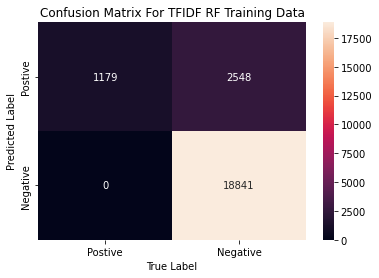

In [59]:
pred_train = rf_tf.predict(X_train_tf)
con_mat_train = confusion_matrix(y_train,pred_train)
label = ['Postive','Negative']
con_mat_data = pd.DataFrame(con_mat_train,index = label,columns = label)
sns.heatmap(con_mat_data,annot = True,fmt = 'd')
plt.title('Confusion Matrix For TFIDF RF Training Data')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

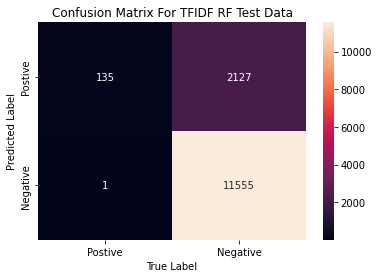

In [60]:
pred_test = rf_tf.predict(X_test_tf)
con_mat_test = confusion_matrix(y_test,pred_test)
label = ['Postive','Negative']
con_mat_data = pd.DataFrame(con_mat_test,index = label,columns = label)
sns.heatmap(con_mat_data,annot = True,fmt = 'd')
plt.title('Confusion Matrix For TFIDF RF Test Data')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [64]:
C = [0.001,0.01,0.1,1,10]
solver = ['liblinear','sag','saga']
param_grid = {'solver':solver,'C':C}

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1')
rscv_bow = RandomizedSearchCV(estimator = lr,
                              param_distributions = param_grid,
                              cv = KFold(n_splits = 5,shuffle = True,random_state =46),
                              n_jobs = -1,verbose = 1)
rscv_bow.fit(X_train_bow,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=46, shuffle=True),
                   estimator=LogisticRegression(penalty='l1'), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   verbose=1)

In [63]:
rscv_bow.best_params_

{'solver': 'saga', 'C': 0.1}

In [67]:
auc_train = []
auc_cv = []
for c in C:
    lr = LogisticRegression(penalty = 'l1',C = c,solver = 'saga')
    lr.fit(X_train_bow,y_train)
    predtr = lr.predict_proba(X_train_bow)[:,1]
    predcv = lr.predict_proba(X_cv_bow)[:,1]
    auc_train.append(roc_auc_score(y_train,predtr))
    auc_cv.append(roc_auc_score(y_cv,predcv))   